In [82]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [164]:
df = pd.read_csv("winemag-data-130k-v2.csv")

In [149]:
df.set_index(df.columns[0],inplace=True)

In [150]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
Unnamed: 0,,,,,,,,,,,,,
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [152]:
df.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [153]:
df.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [155]:
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

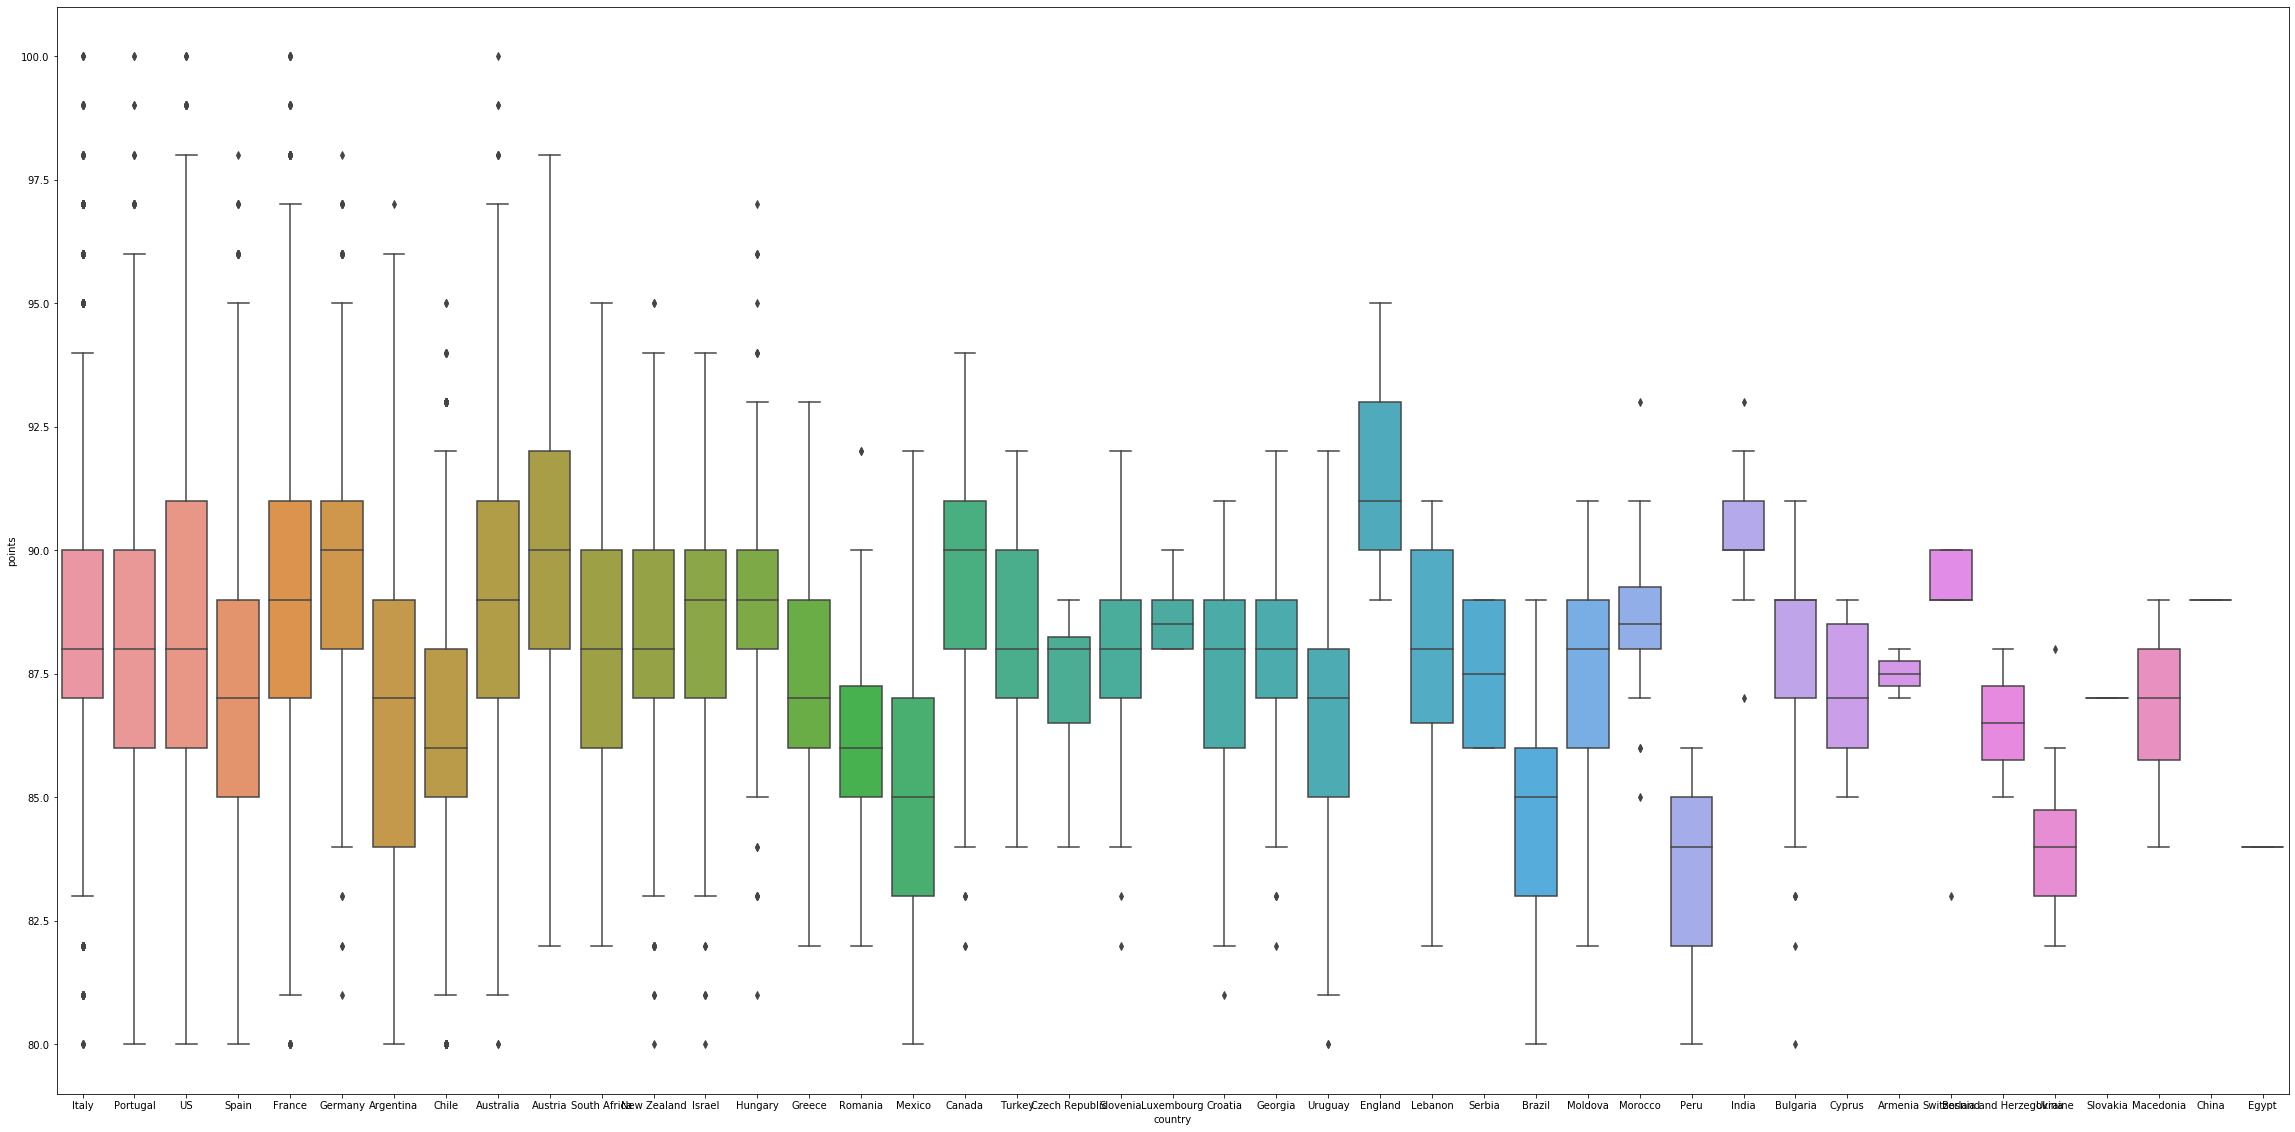

In [156]:
plt.figure(figsize = (40, 20))
sns.boxplot(x = 'country', y = 'points',  data = df)

In [157]:
a = df.groupby('country')[['points']].mean()

<Figure size 2880x1440 with 0 Axes>

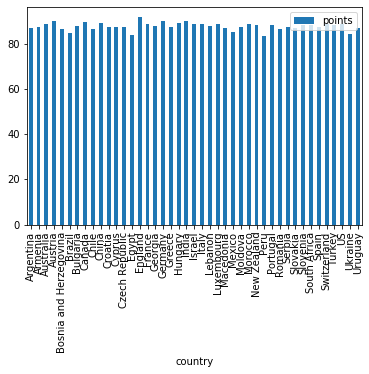

In [158]:
plt.figure(figsize = (40, 20))
a.plot.bar()

In [159]:
a.describe()

,points
count,43.000000
mean,87.648957
std,1.650070
min,83.562500
25%,86.916667
50%,87.686047
75%,88.571429
max,91.581081


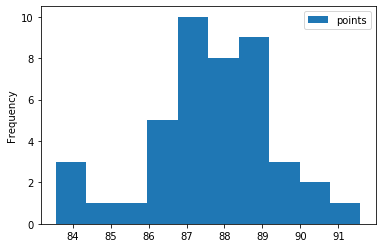

In [160]:
a.plot.hist()

In [166]:
b.dtypes

points    float64
price     float64
dtype: object

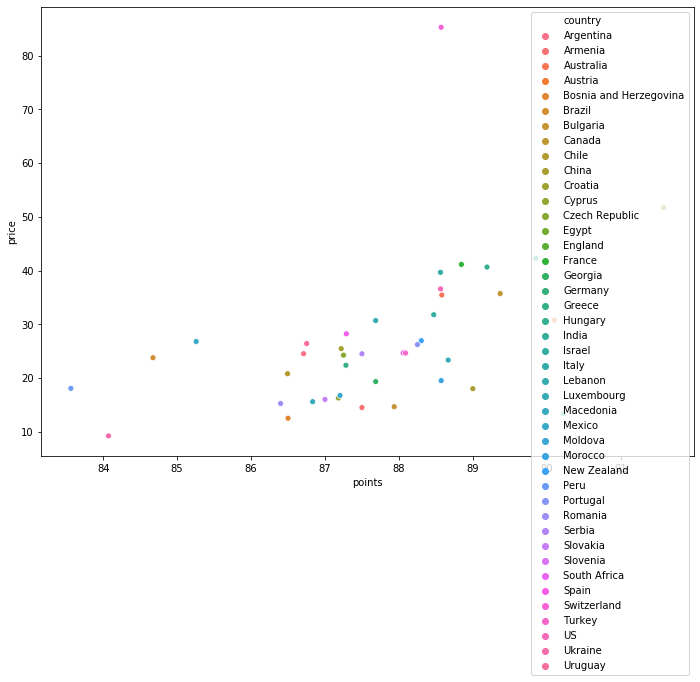

In [167]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(x='points',y='price',hue= b.index, data = b)

In [184]:
b = df.groupby('country')[['points','price']].mean()
b = b.sort_values(by=['points'],ascending=False)

b.head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


In [185]:
b.index[:5]

Index(['England', 'India', 'Austria', 'Germany', 'Canada'], dtype='object', name='country')

In [189]:
topPaises = df[df['country'].isin(b.index[:5])]


In [191]:
topPaises.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
15,15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
76,76,Germany,Earthy pollen and mineral notes lend a savory ...,NaN,86,9.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Schmitt Söhne 2015 Riesling (Rheinhessen),Riesling,Schmitt Söhne
85,85,Germany,"Pronounced dust, pollen and earth tones lend s...",Undone Dry,86,10.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,P.J. Valckenberg 2015 Undone Dry Riesling (Rhe...,Riesling,P.J. Valckenberg
93,93,Austria,"Freshness characterizes the nose: green pear, ...",NaN,88,12.0,Burgenland,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Fuchs 2015 Grüner Veltliner (Burgenland),Grüner Veltliner,Fuchs


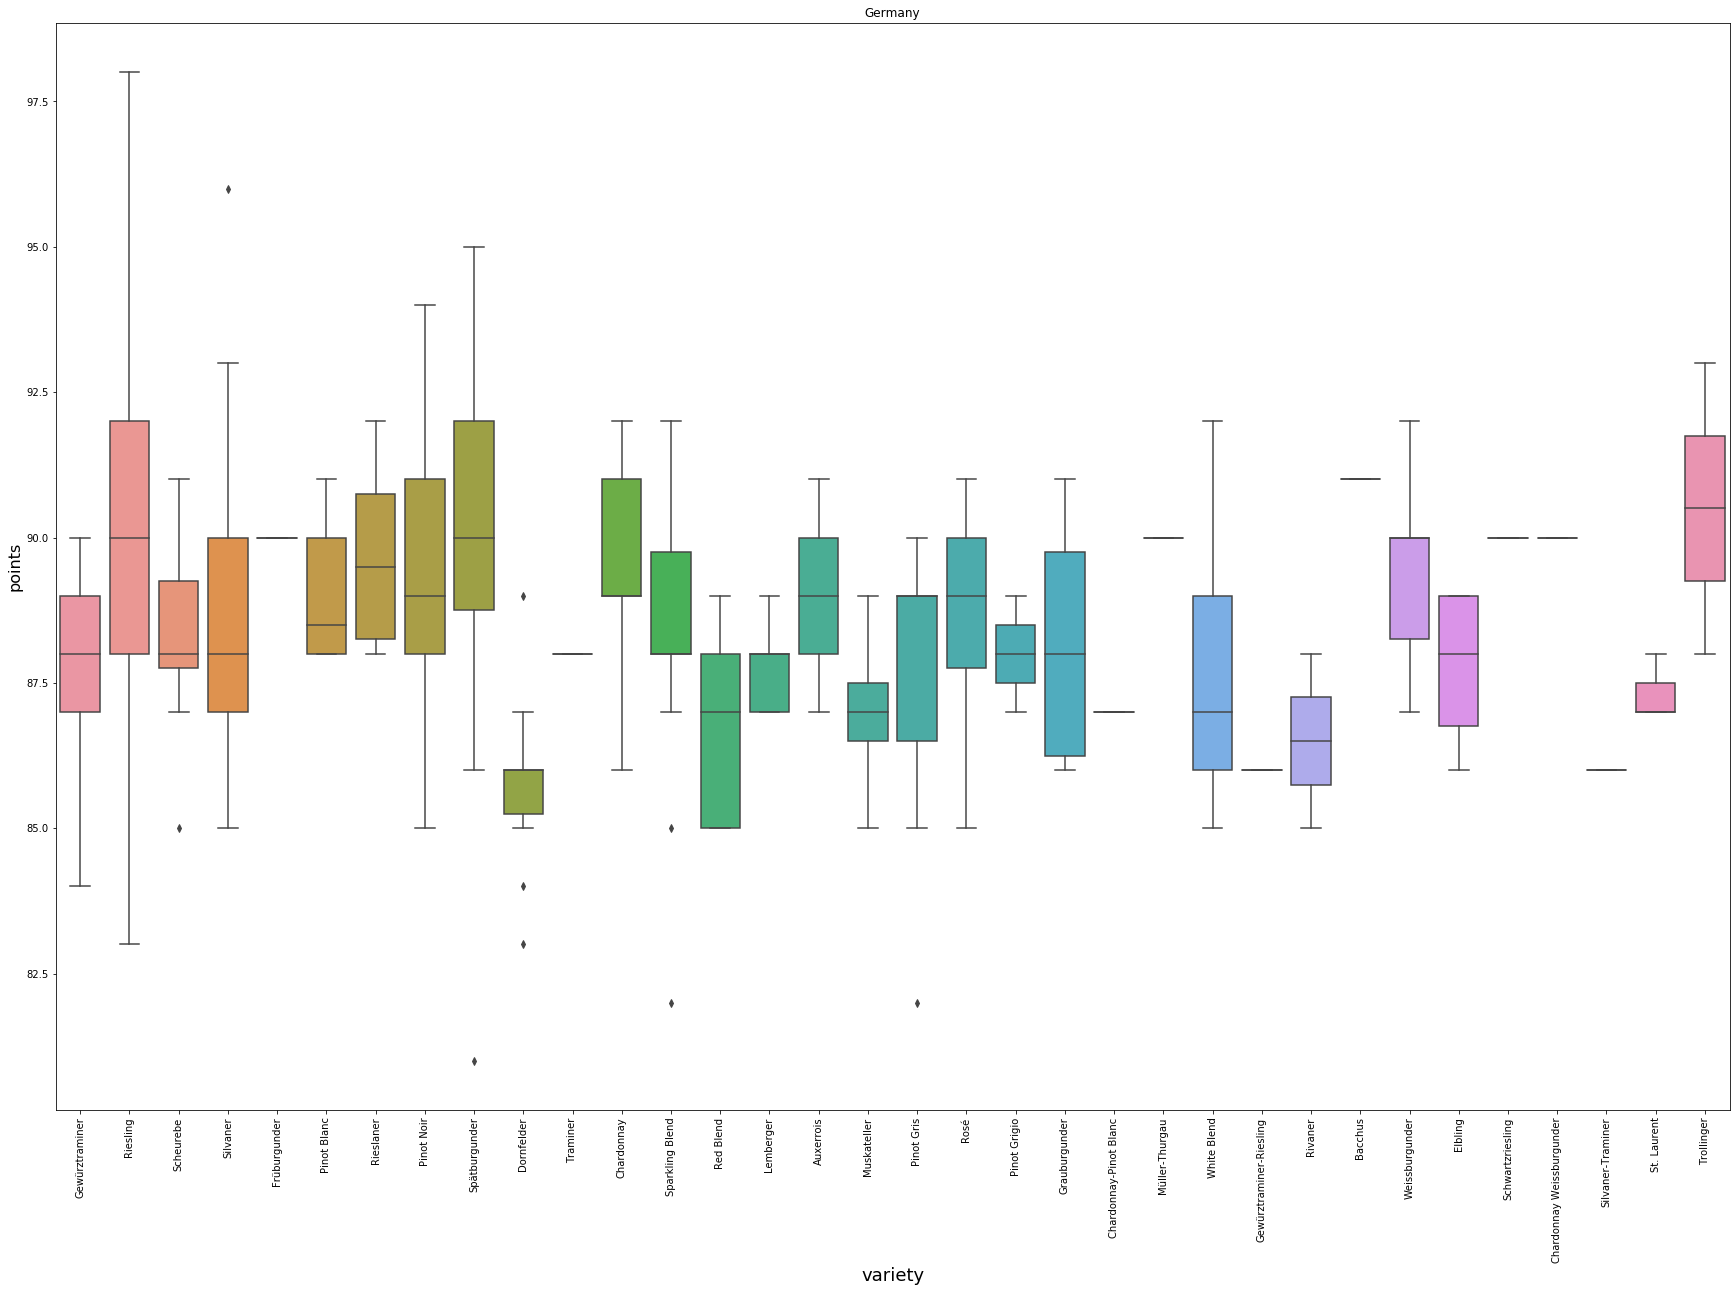

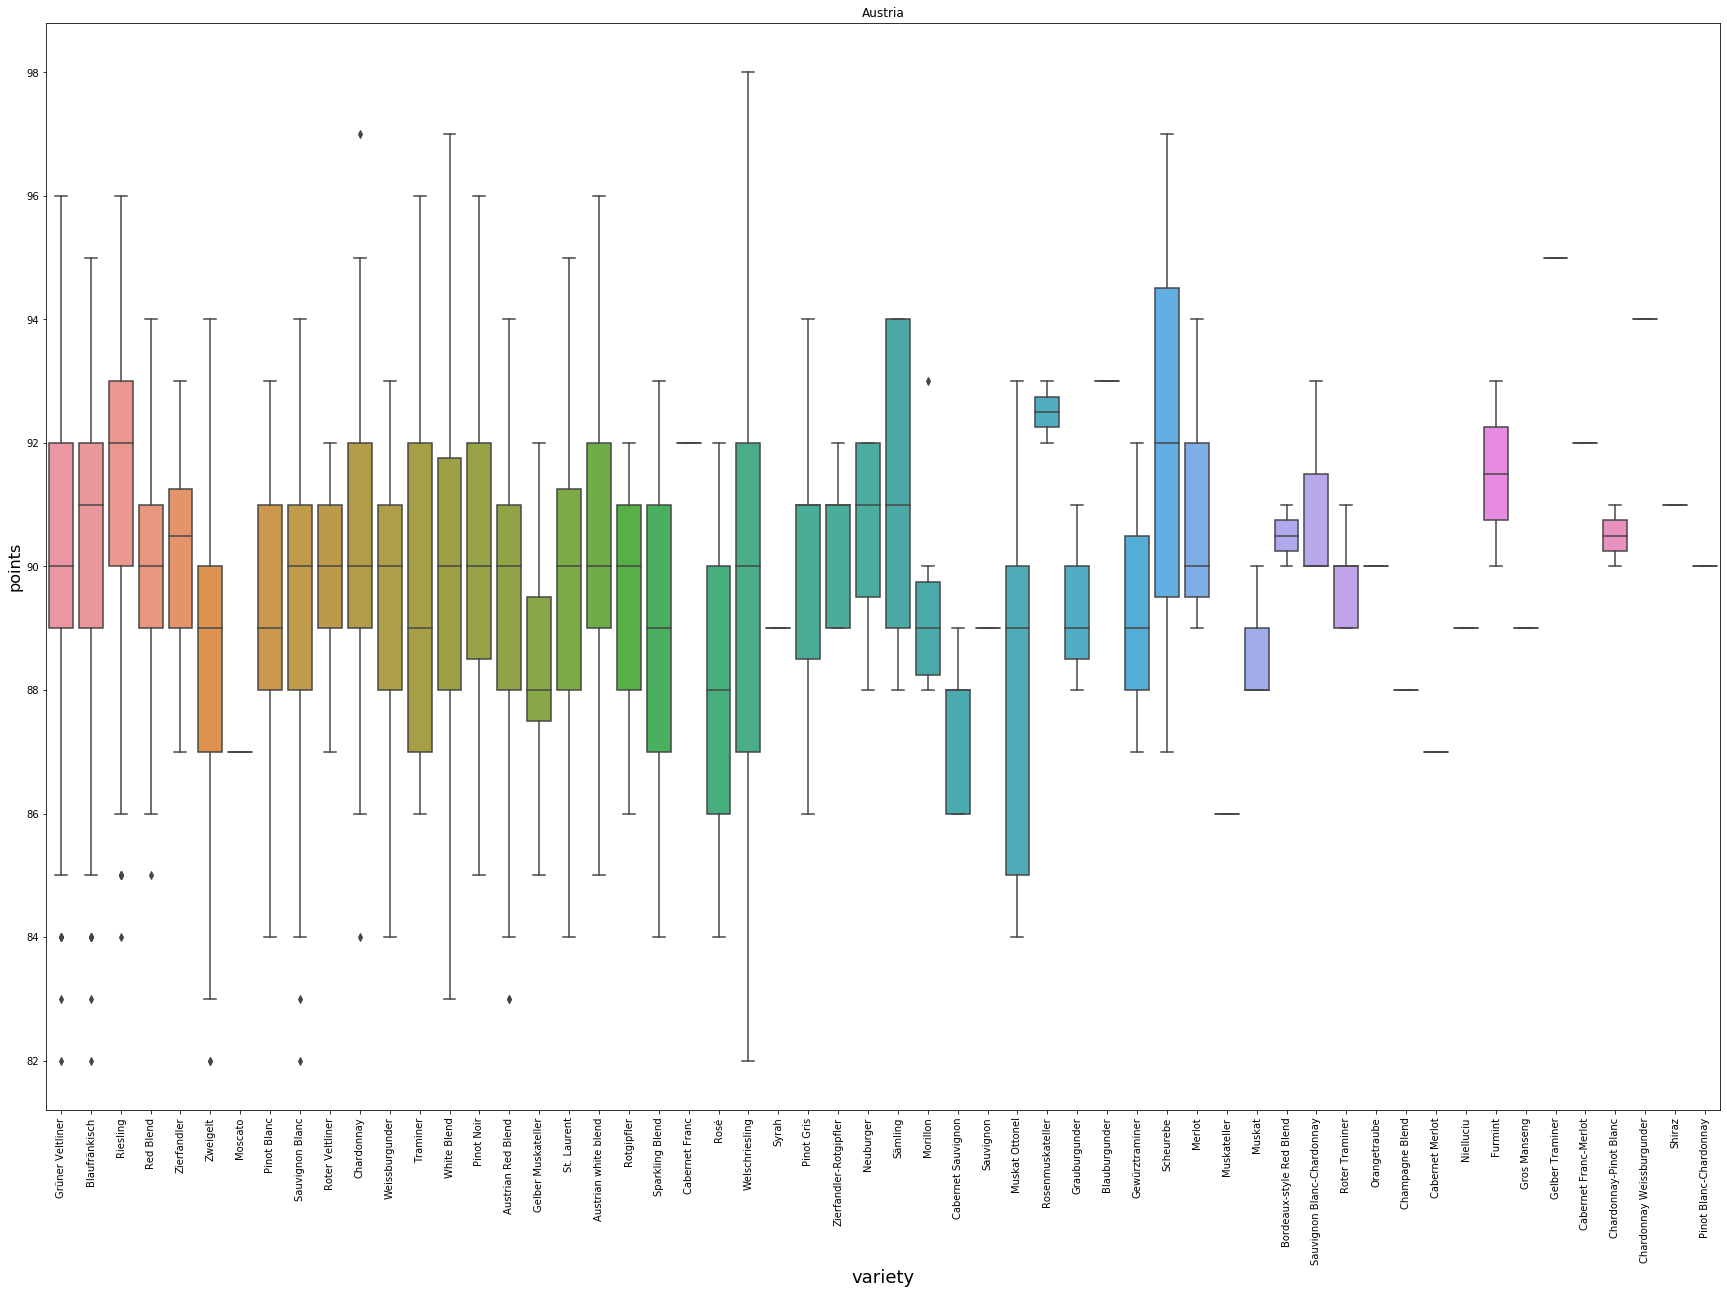

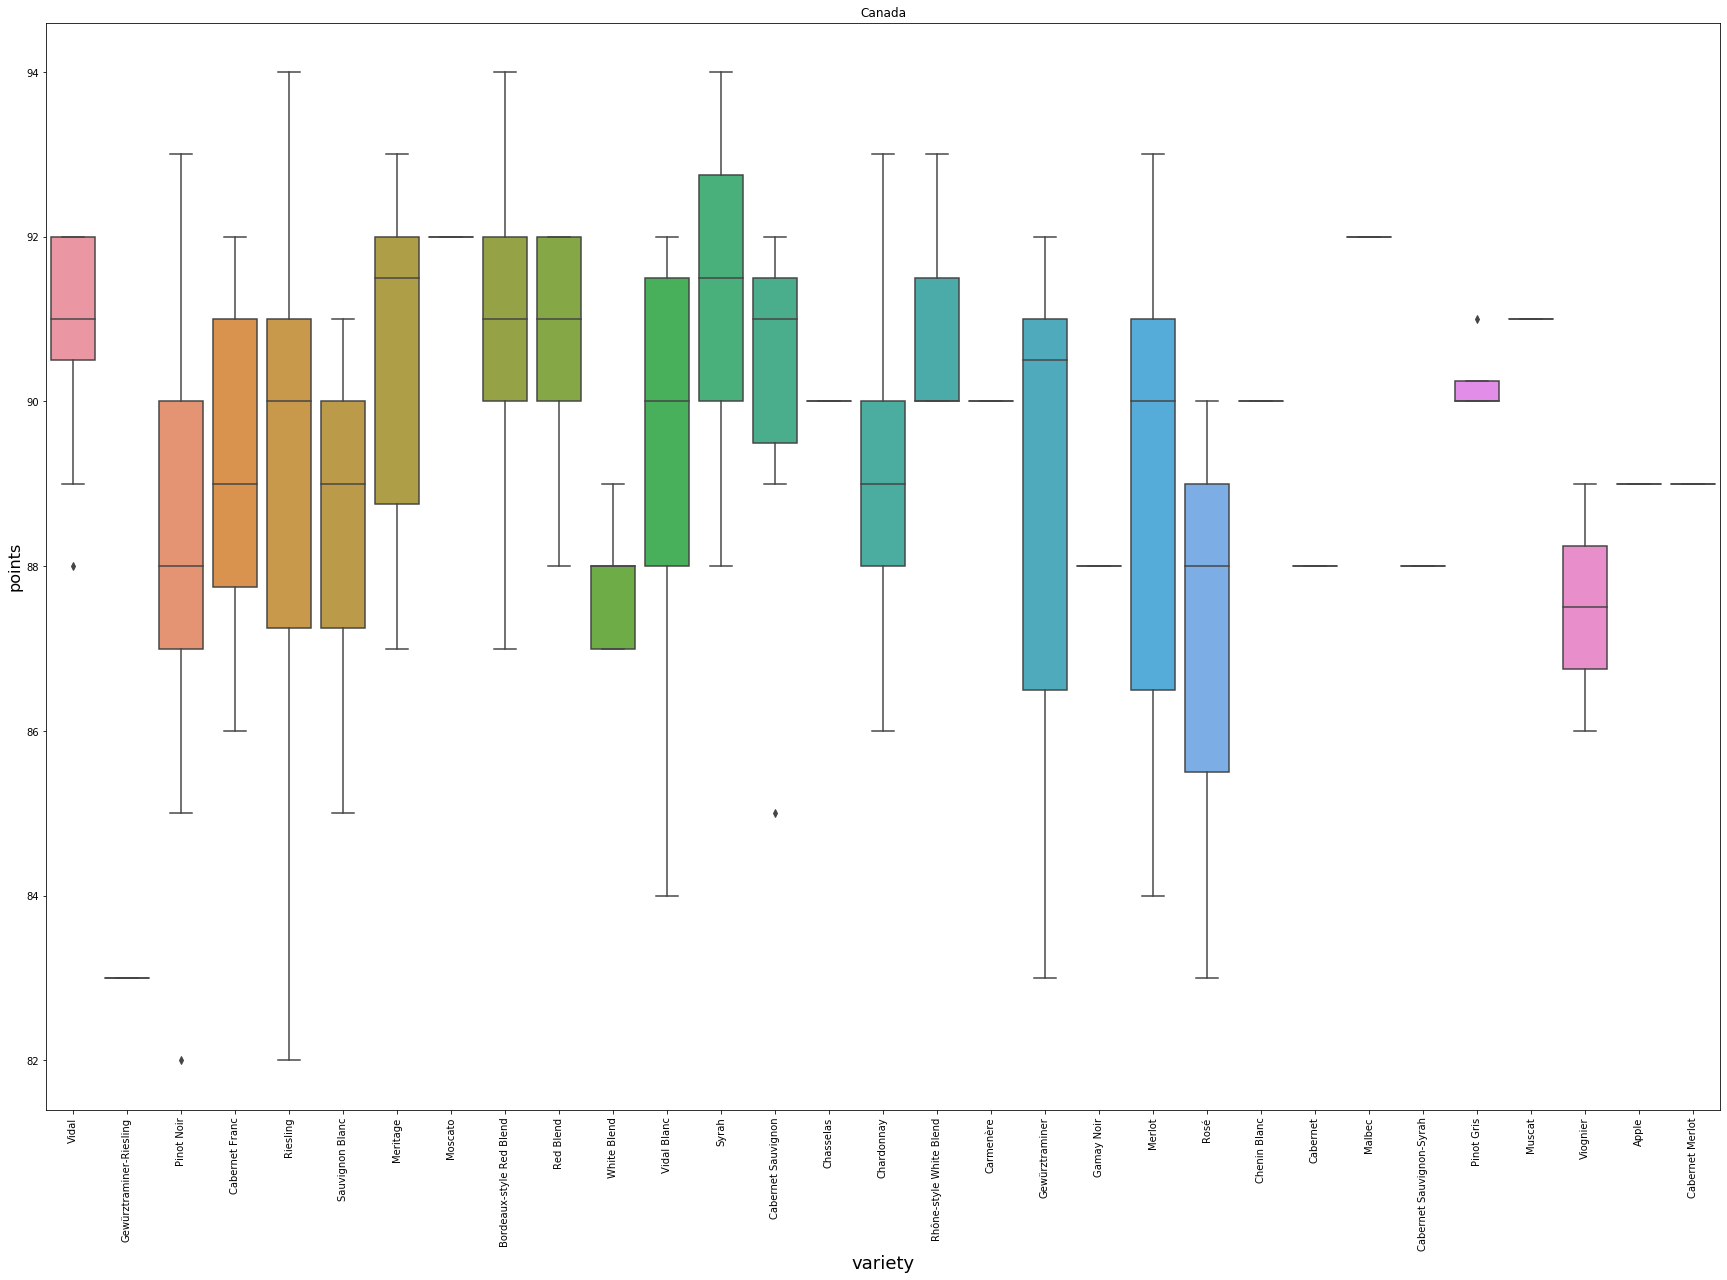

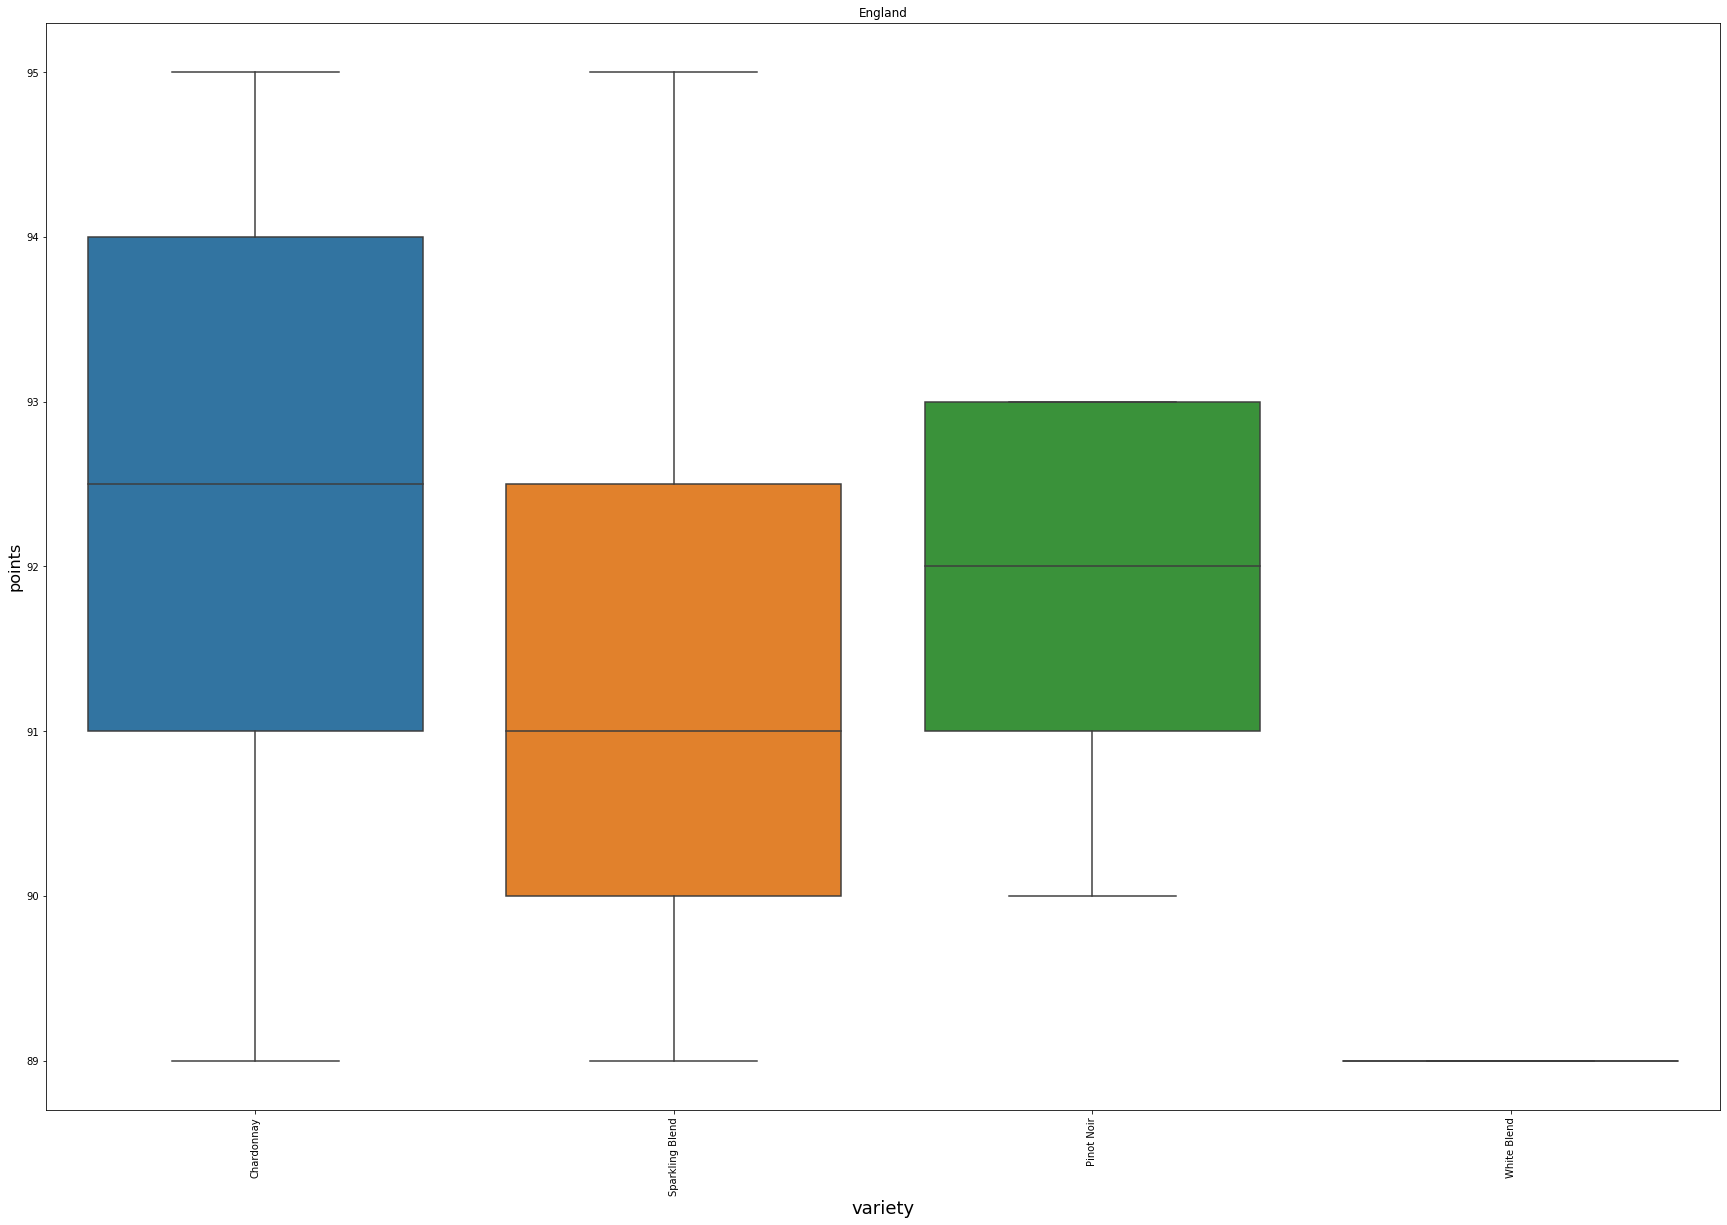

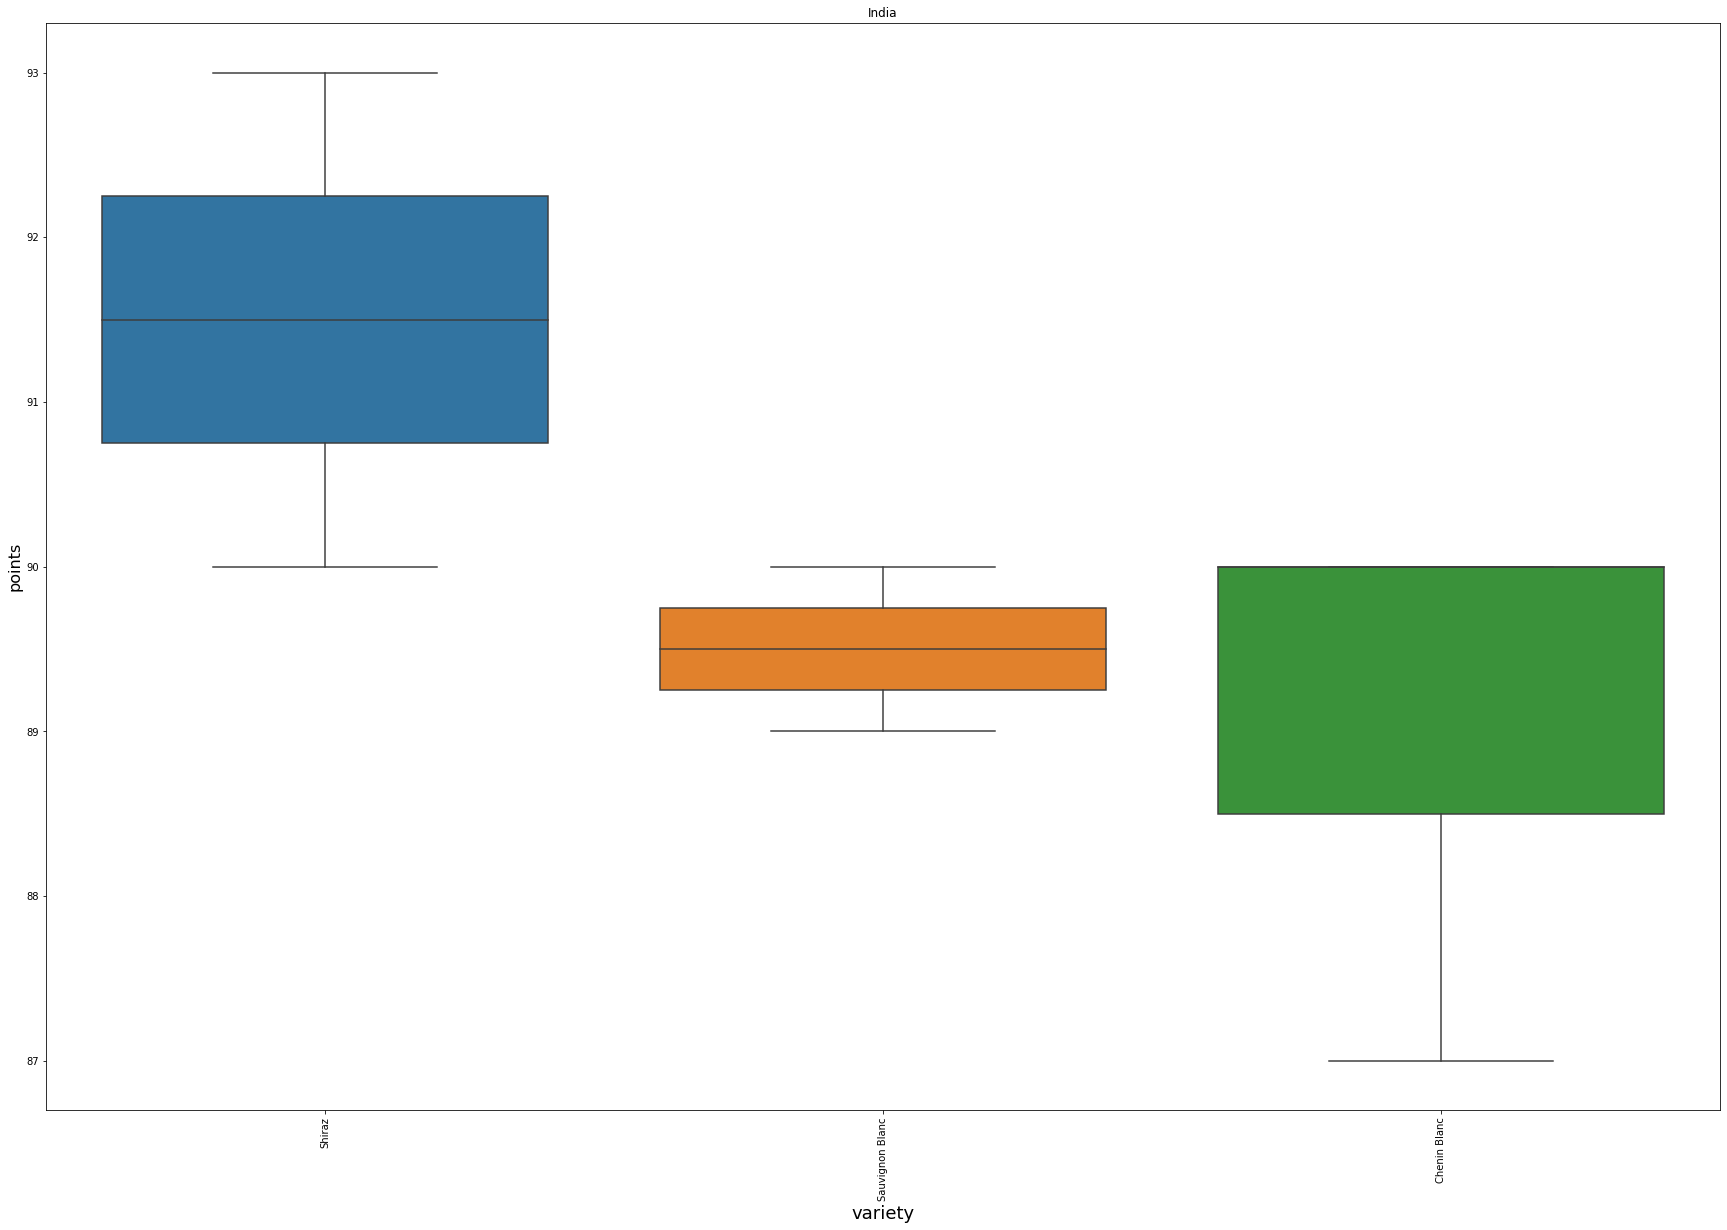

In [194]:
for i in topPaises['country'].unique():
    plt.figure(figsize = (30, 20))
    plt.title(label=i)
    plt.xticks(rotation=90)
    plt.xlabel('xlabel', fontsize=18)
    plt.ylabel('ylabel', fontsize=16)
    sns.boxplot(x = 'variety', y = 'points',  data = df[df['country']==i])

In [200]:
varietyDf = topPaises.groupby(['variety','country'])[['points']].mean()
varietyDf.head(100)

points
variety                    country           
Apple                      Canada   89.000000
Austrian Red Blend         Austria  89.516129
Austrian white blend       Austria  90.329114
Auxerrois                  Germany  89.000000
Bacchus                    Germany  91.000000
...                                       ...
Sauvignon Blanc-Chardonnay Austria  91.000000
Scheurebe                  Austria  91.800000
                           Germany  88.250000
Schwartzriesling           Germany  90.000000
Shiraz                     Austria  91.000000

[100 rows x 1 columns]